### Neural Network Classification with MNIST (Digits)


=== Training with 1 layers, relu activation, adam optimizer ===
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8942 - loss: 0.3761 - val_accuracy: 0.9550 - val_loss: 0.1725
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9501 - loss: 0.1756 - val_accuracy: 0.9645 - val_loss: 0.1303
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9633 - loss: 0.1276 - val_accuracy: 0.9708 - val_loss: 0.1063
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9708 - loss: 0.0994 - val_accuracy: 0.9723 - val_loss: 0.0967
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9774 - loss: 0.0796 - val_accuracy: 0.9748 - val_loss: 0.0874
Test Accuracy: 0.9721

=== Training with 1 layers, sigmoid activation, adam optimizer ===
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8520 - loss: 0.6254 - val_accuracy: 0.9280 - val_loss: 0.2782
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9175 

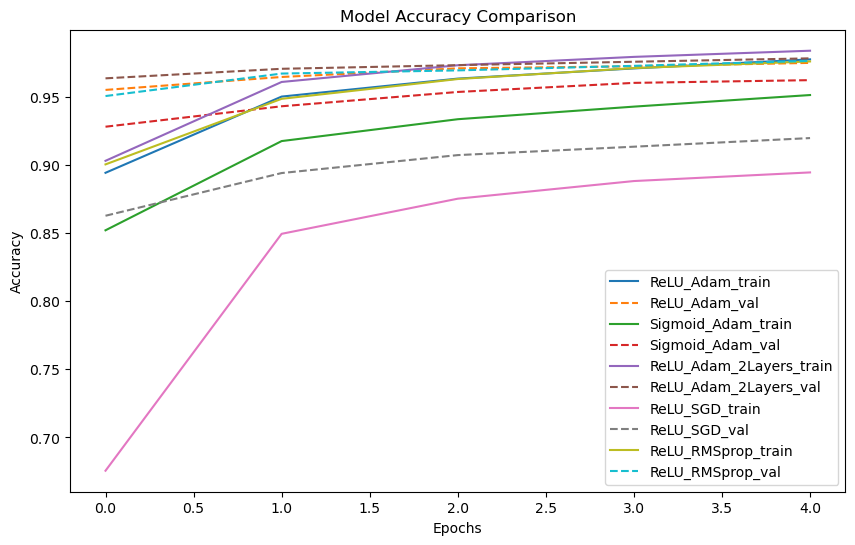

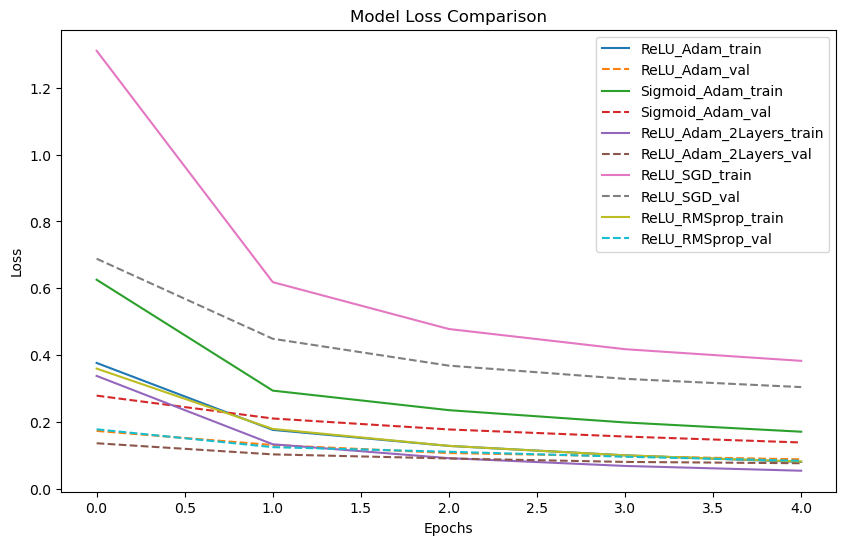

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images 
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


def build_model(hidden_layers=1, 
                hidden_units=128, 
                activation="relu", 
                optimizer="adam", 
                output_activation="softmax"):
    
    model = keras.Sequential()
    model.add(layers.Input(shape=(784,)))
    
    for _ in range(hidden_layers):
        model.add(layers.Dense(hidden_units, activation=activation))
    
    model.add(layers.Dense(10, activation=output_activation))
    
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model


def run_experiment(hidden_layers, activation, optimizer, epochs=5):
    print(f"\n=== Training with {hidden_layers} layers, {activation} activation, {optimizer} optimizer ===")
    model = build_model(hidden_layers=hidden_layers,
                        activation=activation,
                        optimizer=optimizer)
    
    history = model.fit(x_train, y_train, 
                        validation_split=0.1, 
                        epochs=epochs, 
                        batch_size=128, 
                        verbose=1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}")
    return history, test_acc

results = {}


results["ReLU_Adam"], acc1 = run_experiment(1, "relu", "adam")

# Sigmoid vs ReLU
results["Sigmoid_Adam"], acc2 = run_experiment(1, "sigmoid", "adam")

# Doubling hidden layers
results["ReLU_Adam_2Layers"], acc3 = run_experiment(2, "relu", "adam")

# Optimizers: SGD & RMSprop
results["ReLU_SGD"], acc4 = run_experiment(1, "relu", "sgd")
results["ReLU_RMSprop"], acc5 = run_experiment(1, "relu", "rmsprop")


def plot_history(histories, metric="accuracy"):
    plt.figure(figsize=(10,6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name}_train")
        plt.plot(history.history["val_"+metric], linestyle="--", label=f"{name}_val")
    plt.title(f"Model {metric.capitalize()} Comparison")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_history(results, metric="accuracy")
plot_history(results, metric="loss")
